<a href="https://colab.research.google.com/github/yra77/Forecasting/blob/main/Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SSD-Caffe face detector training

(In case anything goes wrong)

In [ ]:
!kill -9 -1

In [ ]:
!ls

## Clone repo

Среда выполнения

In [ ]:
import numpy as np
import tensorflow as tf
from keras.layers import *
from keras.models import *
from keras.optimizers import *
import math
import matplotlib.pyplot as plt

import datetime

import IPython
import IPython.display
import pandas as pd
#import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found ')

## Mount Google Drive

In [ ]:
t=!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
t=!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
t=!apt-get update -qq 2>&1 > /dev/null
t=!apt-get -y install -qq google-drive-ocamlfuse fuse

In [ ]:
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive

My Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

# import glob
# file_path = glob.glob("/gdrive/My Drive/***.txt")
# for file in file_path:
#     print(file)

Mounted at /gdrive


Create models

Выходные данные были обрезаны до нескольких последних строк (5000).
1/1 - 1s - loss: 1.6664e-05
Epoch 17505/20000
1/1 - 1s - loss: 1.6682e-05
Epoch 17506/20000
1/1 - 1s - loss: 1.6698e-05
Epoch 17507/20000
1/1 - 1s - loss: 1.6720e-05
Epoch 17508/20000
1/1 - 1s - loss: 1.6732e-05
Epoch 17509/20000
1/1 - 1s - loss: 1.6748e-05
Epoch 17510/20000
1/1 - 1s - loss: 1.6737e-05
Epoch 17511/20000
1/1 - 1s - loss: 1.6735e-05
Epoch 17512/20000
1/1 - 1s - loss: 1.6696e-05
Epoch 17513/20000
1/1 - 1s - loss: 1.6679e-05
Epoch 17514/20000
1/1 - 1s - loss: 1.6642e-05
Epoch 17515/20000
1/1 - 1s - loss: 1.6631e-05
Epoch 17516/20000
1/1 - 1s - loss: 1.6623e-05
Epoch 17517/20000
1/1 - 1s - loss: 1.6627e-05
Epoch 17518/20000
1/1 - 1s - loss: 1.6633e-05
Epoch 17519/20000
1/1 - 1s - loss: 1.6638e-05
Epoch 17520/20000
1/1 - 1s - loss: 1.6639e-05
Epoch 17521/20000
1/1 - 1s - loss: 1.6636e-05
Epoch 17522/20000
1/1 - 1s - loss: 1.6635e-05
Epoch 17523/20000
1/1 - 1s - loss: 1.6628e-05
Epoch 17524/20000
1/1 - 1s - l

AttributeError: ignored

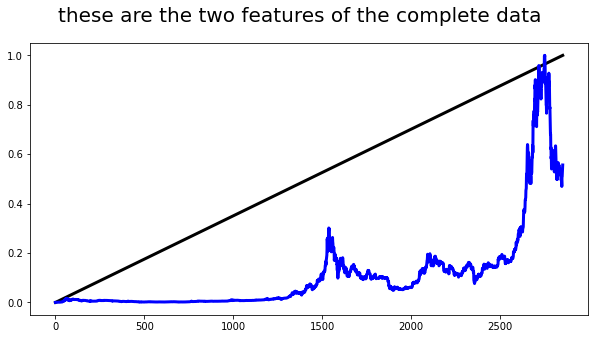

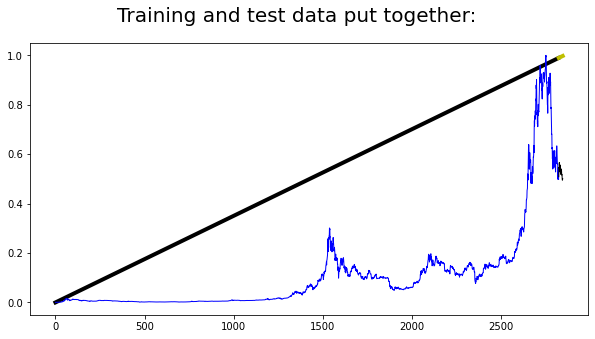

In [ ]:

df = pd.read_csv('/content/drive/ColabNotebooks/btc1.csv')

# "/content/drive/ColabNotebooks/btc1.csv"

shift = 7
trainLength = 2825 #30 days 
totalLength = len(df)  # 2855

# IT`s Mine

## Drop date variable
#data = data.drop(['DATE'], 1)


## Make data a np.array
#df = df.values


scaler = MinMaxScaler()

price = df.BTC.values.reshape(-1, 1)


scaled_price = scaler.fit_transform(price)
scaled_price.shape
np.isnan(scaled_price).any()
scaled_price = scaled_price[~np.isnan(scaled_price)]
scaled_price = scaled_price.reshape(-1, 1)
np.isnan(scaled_price).any()

date = df.DATE.values.reshape(-1, 1)
scaled_date = scaler.fit_transform(date)
scaled_date.shape
np.isnan(scaled_date).any()
scaled_date = scaled_date[~np.isnan(scaled_date)]
scaled_date = scaled_date.reshape(-1, 1)
np.isnan(scaled_date).any()


data = np.empty((1,len(scaled_price),2))

data[0,:,0] = scaled_date.flatten()
data[0,:,1] = scaled_price.flatten()

print(data)
print(data.shape)
print(data[0])


#data = np.empty((1,totalLength,2)) #0 to 1199

##x for the first sinus
#base1 = np.array(range(totalLength))*(30*math.pi/totalLength) #30*pi means 15 complete oscilations
##the first sinus
#data[0,:,0] = np.sin(base1)
#print(base1)
##x for the second sinus - this reflects in a sinus with a different frequency
#base2 = 0.8*base1


##the first * the second sinus 
#data[0,:,1] = (np.sin(base1)+np.sin(base2))/2

#print('data: ', data.shape)

def takeSlice(arr, fr, to, name):
    
    result = arr[:,fr:to,:]
    print(name + ": start at " + str(fr) + " - shape: " + str(result.shape))
    return result


#training data: y is one step ahead of x
x = takeSlice(data,0,trainLength,'x') #de 0 a n
y = takeSlice(data,shift,shift+trainLength,'y') #de 7 a n


#true data for forecasting:
xForecast = takeSlice(data,trainLength,-shift,'xForecast') #de 800 a 1192?
trueForecast = takeSlice(data,shift+trainLength,None,'trueForecast') #de 807 a 1199


#plotting

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
ax.plot(data[0,:,0],color='k',linewidth=3)
ax.plot(data[0,:,1],color='b',linewidth=3)
fig.suptitle('these are the two features of the complete data',fontsize=20)

print('\n\n\n\n')

#figure separating training and forecasting
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
ax.plot(range(trainLength),x[0,:,0],color='k',linewidth=4)
ax.plot(range(trainLength),x[0,:,1],color='b',linewidth=1)
ax.plot(range(trainLength,totalLength-shift),xForecast[0,:,0],color='y',linewidth=4)
ax.plot(range(trainLength,totalLength-shift),xForecast[0,:,1],color='k',linewidth=1)
fig.suptitle('Training and test data put together: ', fontsize=20)


#creating the model    
model = Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(None,2))) #input takes any steps, two features (var1 and var2)
model.add(LSTM(70,return_sequences=True))
model.add(LSTM(2,return_sequences=True)) #output keeps the steps and has two features
model.add(Lambda(lambda x: x*1.3))


#training the model
#this callback interrupts training when loss stops decreasing after 10 consecutive epochs. 
from keras.callbacks import EarlyStopping
stop = EarlyStopping(monitor='loss',min_delta=0.000000000001,patience=30) #this big patience is important

#different learning rates - train each indefinitely until the loss stops decreasing
#fount that the best rate is between 0.0001 and 0.00001
rates = [0.01,0.001,0.0001,0.00001]
for rate in rates:
   print('training with lr = ' + str(rate))
   opt = tf.keras.optimizers.Adam(learning_rate=rate)
   model.compile(opt, loss='mse')
   model.fit(x,y,epochs=20000,callbacks=[stop],verbose=2) #train indefinitely until loss stops decreasing
   print('\n\n\n\n\n')


#model = tf.keras.models.load_model("C:/Users/User/source/repos/Forecasting/Model/model_31_07.h5")

newModel = Sequential()
newModel.add(LSTM(100,return_sequences=True,stateful=True,batch_input_shape=(1,None,2)))
newModel.add(LSTM(70,return_sequences=True,stateful=True))
newModel.add(LSTM(2,return_sequences=False,stateful=True))
newModel.add(Lambda(lambda x: x*1.3))

newModel.set_weights(model.get_weights())


#newModel.save('C:/Users/User/source/repos/Forecasting/Model/NewModel')
newModel.save("/content/drive/ColabNotebooks/new_model_31_07.h5")
#model.save('/content/drive/ColabNotebooks/Symbol_Plate/')
model.save("/content/drive/ColabNotebooks/model_31_07.h5")



#predicting from the predictions themselves (gets the training data as input to set states)
newModel.reset_states()


lastSteps = np.empty((1,totalLength-trainLength,2)) #includes a shift at the beginning to cover the gap 
lastSteps[:,:shift] = x[:,-shift:] #the initial shift steps are filled with x training data 
newModel.predict(x[:,:-shift,:]).reshape(1,1,2) #just to adjust states, predict with x without the last shift elements

rangeLen = totalLength-trainLength-shift
print('rangeLen: ', rangeLen)
for i in range(rangeLen):
    lastSteps[:,i+shift] = newModel.predict(lastSteps[:,i:i+1,:]).reshape(1,1,2)
print(lastSteps.shape)
forecastFromSelf = lastSteps[:,shift:,:]
print(forecastFromSelf.shape)


#predicting from test/future data:
newModel.reset_states()

newModel.predict(x) #just to set the states and get used to the sequence
newSteps = []
for i in range(xForecast.shape[1]):
    newSteps.append(newModel.predict(xForecast[:,i:i+1,:]))
forecastFromInput = np.asarray(newSteps).reshape(1,xForecast.shape[1],2)

print('trueForecast: ', trueForecast.shape)
print('forecastFromSelf: ', forecastFromSelf.shape)
print('forecastFromInput: ', forecastFromInput.shape)
print('\n\n\nblack line: true values')
print('gold line: predicted values')

#y_test_inverse = scaler.inverse_transform(xForecast[0])
#print(y_test_inverse)
#y_hat_inverse = scaler.inverse_transform(y_hat)


xF = [100000*x for x in xForecast[0,:,0]]
xFo = [100000*x for x in xForecast[0,:,1]]
fo = [100000*x for x in forecastFromSelf[0,:,0]]
foro = [100000*x for x in forecastFromSelf[0,:,1]]


#self forecast
fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(xF, linewidth=7,color='k') #this uses xForecast because it starts exactly where x ends
ax.plot(fo,color='y')
plt.suptitle("predicting feature 1 - self predictions")


fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(xFo,linewidth=7,color='k') #this uses xForecast because it starts exactly where x ends
ax.plot(foro,color='y')
plt.suptitle("predicting feature 2 - self predictions")


trueForecast[0,:,0] = [100000*x for x in trueForecast[0,:,0]]
trueForecast[0,:,1] = [100000*x for x in trueForecast[0,:,1]]
forecastFromInput[0,:,0] = [100000*x for x in forecastFromInput[0,:,0]]
forecastFromInput[0,:,1] = [100000*x for x in forecastFromInput[0,:,1]]


#forecast from test/future data:
fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(trueForecast[0,:,0], linewidth=7,color='k')
ax.plot(forecastFromInput[0,:,0],color='y')
plt.suptitle("predicting feature 1 - predictions from true data")


fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(trueForecast[0,:,1],linewidth=7,color='k')
ax.plot(forecastFromInput[0,:,1],color='y')
plt.suptitle("predicting feature 2 - predictions from true data")


plt.show()
